<a href="https://colab.research.google.com/github/Sterwinxs/Formacao-Data-Science/blob/main/10_Visualizar_dados_com_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

 Leitura de Arquivo CSV, atribuindo o próprio para uma Variável.

In [ ]:
tmdb= pd.read_csv("tmdb_5000_movies.csv")

In [24]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


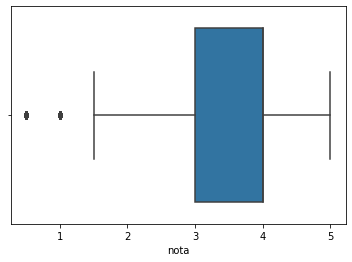

In [25]:
sns.boxplot(base.nota)

Observe que 50% das pessoas dão notas de 3 a 4 (as duas barras de cor azul demonstram cada 25% e as brancas laterais também 25%0

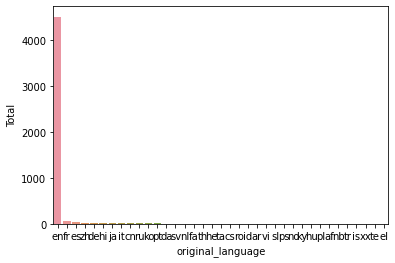

In [26]:
sns.barplot(x="original_language", y= "Total",data= contagem_de_lingua)

Observe que ao tentarmos criar um Gráfico, como os filmes em inglês são em uma maior quantidade ele se destaca e os demais ficam impossiveis de se ler e analisar os dados.

Precisamos diminuir a variedade destes dados para se tornar mais apresentavel em um Gráfico.
Iremos calcular ops dados:

In [27]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles= total_por_lingua.loc["en"]
total_do_resto= total_geral - total_de_ingles
print(total_de_ingles,total_do_resto)

4505 298


Iremos criar um Data Frame com Inglês e outros, dessa forma se torna possível observar a quantidade de filmes em inglês e a quantidade de outros de forma mais ágil.

In [29]:
dados = {
    'Lingua' : ['Ingles','Outros'],
    'Total' : [total_de_ingles, total_do_resto]

}

pd.DataFrame(dados)

,Lingua,Total
0,Ingles,4505
1,Outros,298


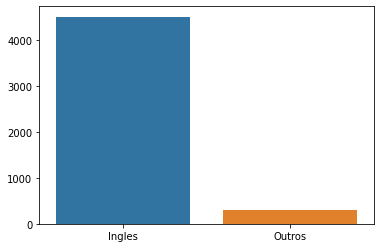

In [30]:
sns.barplot(data = dados, x = 'Lingua', y = 'Total')

Isolando em uma variável todos os filmes que não são em inglês.

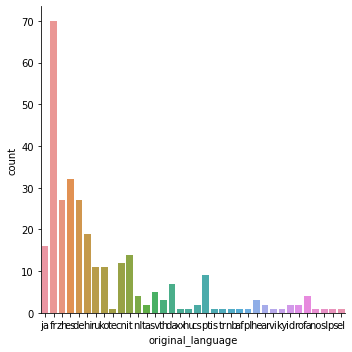

In [38]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en' ")
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

Mesmo isolando os filmes em inglês há uma variedade muito grande e o gráfico está muito bagunçado.

In [39]:
total_por_lingua_de_outros_filmes= tmdb.query("original_language != 'en'").original_language.value_counts()

Utilizamos Aspect para aumentar o tamanho lateral, em ordem pegamos como base a varíavel  de total_por_lingua_de_outros_filmes para conseguir ter em ordem de quantidade de maior para menor e escolhemos a paleta GnBu_r.

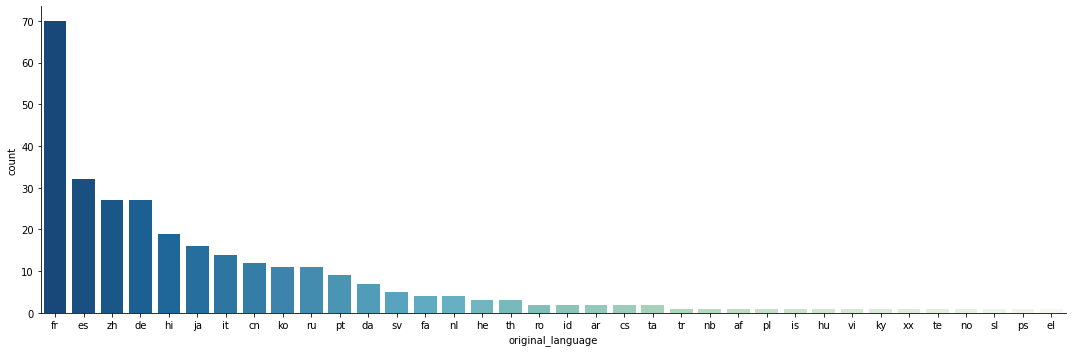

In [36]:
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count", aspect=3, order= total_por_lingua_de_outros_filmes.index, palette= "GnBu_r")